<a href="https://colab.research.google.com/github/whkaikai/-python-/blob/main/%E7%81%B0%E5%BA%A6%E5%8F%98%E6%8D%A2_%E5%88%86%E6%AE%B5%E5%8F%98%E6%8D%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[INFO] matplotlib版本为：3.2.2
91 138


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20285 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25442 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32467 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26524 missing from current font.
  font.set_

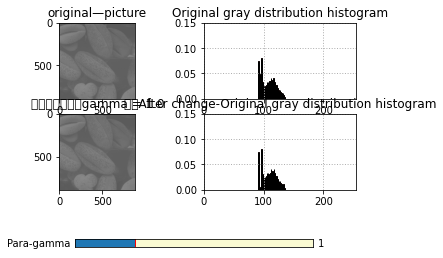

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

def set_chinese():   # 中文显示工具函数
	import matplotlib
	print("[INFO] matplotlib版本为：%s" % matplotlib.__version__)
	matplotlib.rcParams['font.sans-serif'] = ['FangSong']
	matplotlib.rcParams['axes.unicode_minus'] = False

def gamma_trans(input, gamma=2, eps=0 ):
    return 255. * (((input + eps)/255.) ** gamma)


def update_gamma(val):

    # 获取滑块数值，作为γ
    gamma_ = slider1.val

    # 对原图执行γ变换
    output = gamma_trans(gray_img, gamma_, 0.2)

    # 显示γ变换结果图像
    ax3.clear()
    ax3.set_title("伽马变换结果，gamma = " + str(round(gamma_,2)))
    ax3.imshow(output, cmap='gray',vmin=0,vmax=255)
    # 显示γ变换结果图像的灰度分布直方图
    ax4.clear()
    ax4.set_xlim(0, 255)  # 设置x轴分布范围
    ax4.set_ylim(0, 0.15)  # 设置y轴分布范围
    ax4.grid(True, linestyle=':', linewidth=1)
    ax4.set_title('伽马After change-Original gray distribution histogram', fontsize=12)
    ax4.hist(output.flatten(),bins=50,density=True,color='r',edgecolor='k')


if __name__ == '__main__':

    set_chinese()

    # 读入原图
    gray_img = np.asarray(Image.open('/content/washed_out_pollen_image.tif').convert('L'))
    print(np.min(gray_img),np.max(gray_img))
    # 创建一个显示主体，并分成四个显示区域
    fig = plt.figure()
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    # 显示原图
    ax1.set_title("original—picture")
    ax1.imshow(gray_img, cmap='gray', vmin=0, vmax=255)

    # 显示原图的灰度分布直方图
    ax2.grid(True, linestyle=':', linewidth=1)
    ax2.set_title('Original gray distribution histogram', fontsize=12)
    ax2.set_xlim(0, 255)  # 设置x轴分布范围
    ax2.set_ylim(0, 0.15)  # 设置y轴分布范围
    ax2.hist(gray_img.flatten(), bins=50,density=True,color='r',edgecolor='k')

    # 在显示主体下方创建滑动条，用于交互控制γ值
    plt.subplots_adjust(bottom=0.3)
    s1 = plt.axes([0.25, 0.1, 0.55, 0.03], facecolor='lightgoldenrodyellow')
    slider1 = Slider(s1, 'Para-gamma', 0.0, 4.0,
                      valfmt='%.f', valinit=1.0, valstep=0.1)
    slider1.on_changed(update_gamma)
    slider1.reset()
    slider1.set_val(1.0)



    plt.show()


[INFO] matplotlib版本为：3.2.2
[INFO] 原图尺寸为： (889, 889)


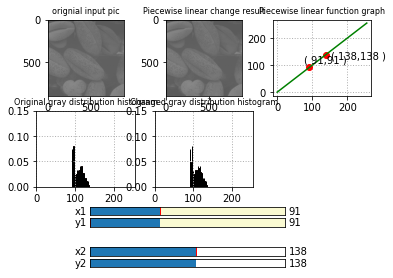

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def set_chinese():   # 中文显示工具函数
	import matplotlib
	print("[INFO] matplotlib版本为：%s" % matplotlib.__version__)
	matplotlib.rcParams['font.sans-serif'] = ['SimHei']
	matplotlib.rcParams['axes.unicode_minus'] = False

# 三段对比度拉伸变换，其中x1,y1和x2,y2为分段点
def three_linear_trans(x, x1,y1, x2,y2):
	# 1.检查参数，避免分母为0
	if x1 == x2 or x2 == 255:
		print("[INFO] x1=%d,x2=%d ->调用此函数必须满足:x1≠x2且x2≠255" % (x1, x2))
		return None

	# 2.执行分段线性变换
	##【慢速算法】
	# out = np.zeros(x.shape)
	# for i in range(x.shape[0]):
	# 	for j in range(x.shape[1]):
	# 		if x[i,j] < x1:
	# 			out[i,j] = y1/x1*x[i,j]
	# 		elif x1 <= x[i,j] <= x2:
	# 			out[i,j] = (y2-y1)/(x2-x1)*(x[i,j]-x1)+y1
	# 		elif x[i,j] > x2:
	# 			out[i,j] = (255-y2)/(255-x2)*(x[i,j]-x2)+y2

	#【快速算法】
	m1=(x<x1)
	m2=(x1<=x)&(x<=x2)#注意这边要用“&”，且注意运算顺序
	m3=(x>x2)

	out = (y1/x1*x)*m1 \
		  + ((y2-y1)/(x2-x1)*(x-x1)+y1)*m2 \
		  + ((255-y2)/(255-x2)*(x-x2)+y2)*m3

	# 3.获取分段线性函数的点集，用于绘制函数图像
	x_point = np.arange(0, 256, 1)
	cond2 =[True if (i>=x1 and i<=x2) else False for i in x_point]
	y_point = (y1/x1*x_point)*(x_point<x1) \
		      + ((y2-y1)/(x2-x1)*(x_point-x1)+y1)*cond2 \
		      + ((255-y2)/(255-x2)*(x_point-x2)+y2)*(x_point>x2)

	return out, x_point, y_point




def update_trans(val):

	# 读入4个滑动条的值
	x1, y1 = slider_x1.val, slider_y1.val
	x2, y2 = slider_x2.val, slider_y2.val

	# 下面这段代码用于确保x2>x1,y2>y1，从而保证函数单调
	if x1>=x2:
		x1=x2-1
	if y1>=y2:
		y1=y2-1
	
	# 执行分段线性变换
	out, x_point, y_point = three_linear_trans(gray_img,
												x1,y1,
												x2,y2)

	# 显示变换结果图像
	ax2.clear()
	ax2.set_title("Piecewise linear change result", fontsize=8)
	ax2.imshow(out,cmap='gray',vmin=0,vmax=255)

	# 绘制函数图像
	ax3.clear()	
	ax3.annotate('( %d,%d )'%(x1,y1),xy=(x1,y1),xytext=(x1-15, y1+15))
	ax3.annotate('( %d,%d )'%(x2,y2),xy=(x2,y2),xytext=(x2+15, y2-15))
	ax3.set_title("Piecewise linear function graph", fontsize=8)
	ax3.grid(True,linestyle=':',linewidth=1)
	ax3.plot([x1,x2],[y1,y2],'ro')
	ax3.plot(x_point, y_point, 'g')

	# 显示变换结果的灰度分布直方图
	ax5.clear()
	ax5.grid(True, linestyle=':', linewidth=1)
	ax5.set_title('Changed gray distribution histogram', fontsize=8)
	ax5.set_xlim(0, 255)  # 设置x轴分布范围
	ax5.set_ylim(0, 0.15)  # 设置y轴分布范围
	ax5.hist(out.flatten(), bins=50, density=True, color='r', edgecolor='k')


if __name__ == '__main__':

	set_chinese()

	# 以灰度方式读入图像
	gray_img = np.asarray(Image.open('/content/washed_out_pollen_image.tif').convert('L'))
	print("[INFO] 原图尺寸为：" , gray_img.shape)

	# 创建一个显示主体，并分成五个显示区域
	fig = plt.figure()
	ax1 = fig.add_subplot(231)
	ax2 = fig.add_subplot(232)
	ax3 = fig.add_subplot(233)
	ax4 = fig.add_subplot(234)
	ax5 = fig.add_subplot(235)

	# 显示原图及其灰度分布直方图
	ax1.set_title("orignial input pic", fontsize=8)
	ax1.imshow(gray_img,cmap='gray',vmin=0,vmax=255)

	ax4.grid(True, linestyle=':', linewidth=1)
	ax4.set_title('Original gray distribution histogram', fontsize=8)
	ax4.set_xlim(0, 255)  # 设置x轴分布范围
	ax4.set_ylim(0, 0.15)  # 设置y轴分布范围
	ax4.hist(gray_img.flatten(), bins=50, density=True, color='r', edgecolor='k')

	# 创建四个滑动条，用于调节x1，y1，x2，y2四个值
	plt.subplots_adjust(bottom=0.3)
	x1 = plt.axes([0.25, 0.2, 0.45, 0.03],
				  facecolor='lightgoldenrodyellow')
	slider_x1 = Slider(x1, 'x1', 0.0, 255.,
					   valfmt='%.f', valinit=91, valstep=1)
	slider_x1.on_changed(update_trans)
	
	y1 = plt.axes([0.25, 0.16, 0.45, 0.03],
				  facecolor='lightgoldenrodyellow')
	slider_y1 = Slider(y1, 'y1', 0.0, 255.,
					   valfmt='%.f', valinit=0, valstep=1)
	slider_y1.on_changed(update_trans)
	
	x2 = plt.axes([0.25, 0.06, 0.45, 0.03],
				  facecolor='white')
	slider_x2 = Slider(x2, 'x2', 0.0, 254.,
					   valfmt='%.f', valinit=138, valstep=1)
	slider_x2.on_changed(update_trans)
	
	y2 = plt.axes([0.25, 0.02, 0.45, 0.03],
				  facecolor='white')
	slider_y2 = Slider(y2, 'y2', 0.0, 255.,
					   valfmt='%.f', valinit=255, valstep=1)
	slider_y2.on_changed(update_trans)

	slider_x1.set_val(91)
	slider_y1.set_val(91)
	slider_x2.set_val(138)
	slider_y2.set_val(138)



	plt.show()
	